<a href="https://colab.research.google.com/github/aryan2107-cloud/100-Day-ML-Challenge-/blob/main/Day26_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
print('Setup complete')

Setup complete


## K-Means Algorithm

**Goal:** Partition data into K clusters

**Algorithm:**
1. Initialize K centroids (randomly or K-Means++)
2. Assign each point to nearest centroid
3. Update centroids (mean of assigned points)
4. Repeat 2-3 until convergence

In [4]:
df = pd.read_csv("/content/Mall_Customers.csv")

print(f"Dataset: {df.shape[0]} customers, {df.shape[1]} columns")
df.head()

Dataset: 200 customers, 5 columns


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


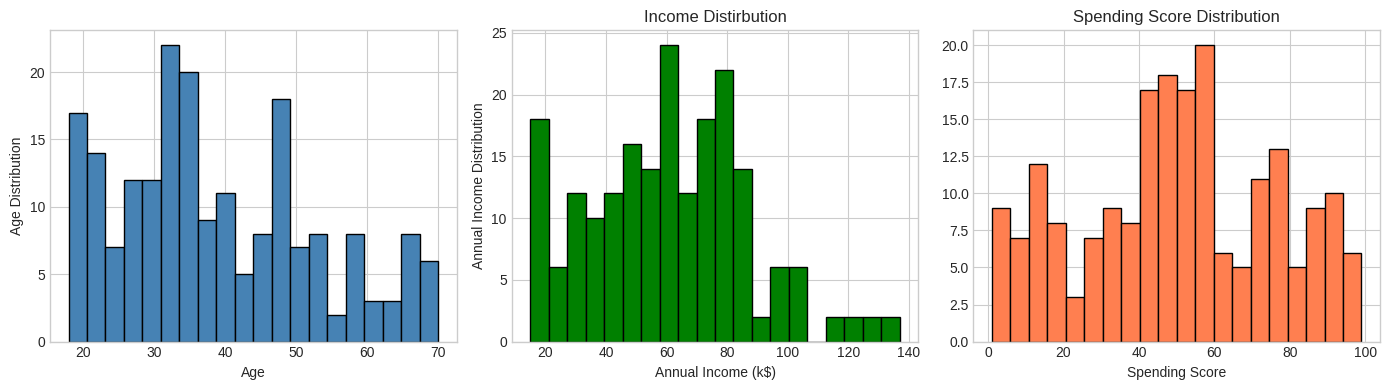

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

axes[0].hist(df['Age'], bins=20, edgecolor='black', color='steelblue')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Age Distribution')

axes[1].hist(df['Annual Income (k$)'], bins=20, edgecolor='black', color='green')
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Annual Income Distribution')
axes[1].set_title("Income Distirbution")

axes[2].hist(df['Spending Score (1-100)'], bins=20, edgecolor='black', color='coral')
axes[2].set_xlabel('Spending Score')
axes[2].set_title('Spending Score Distribution')

plt.tight_layout()
plt.show()


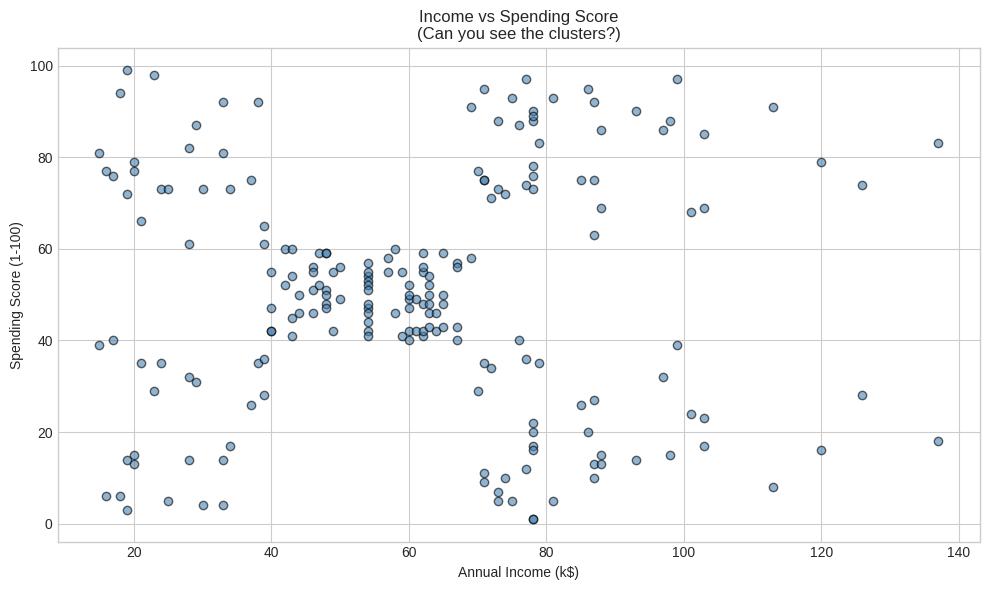

In [7]:
# Key relationship: Income vs Spending
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c='steelblue', alpha=0.6, edgecolor='black')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Income vs Spending Score\n(Can you see the clusters?)')
plt.tight_layout()
plt.show()

In [8]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

print(f"Feature matrix shape: {x.shape}")

Feature matrix shape: (200, 2)


In [9]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

print("Features Scaled")

Features Scaled


Choosing K - The elbow method

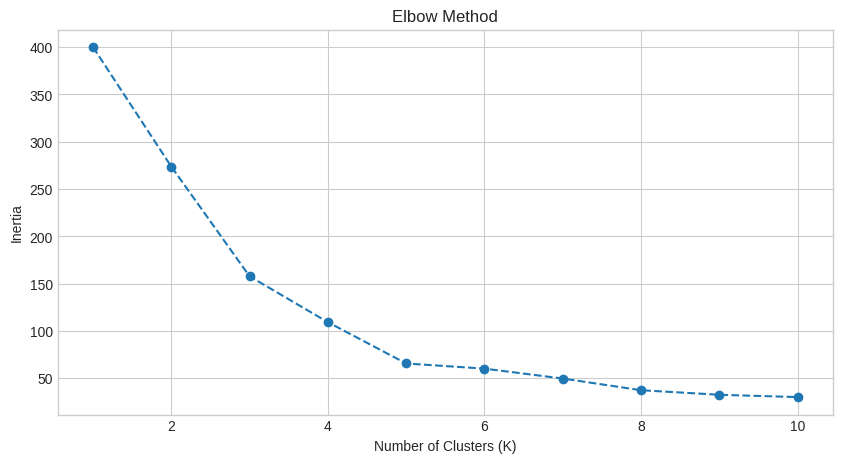

In [10]:
# inertia = sum of squared distances to nearest centroid
# Lower inertia = tighter clusters

k_range = range(1, 11)
inertias = []

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(x_scaled)
  inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k_range, inertias, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Look for the 'elbow' where adding more clusters doesn't help much

Choosing K: Silhoutte Score

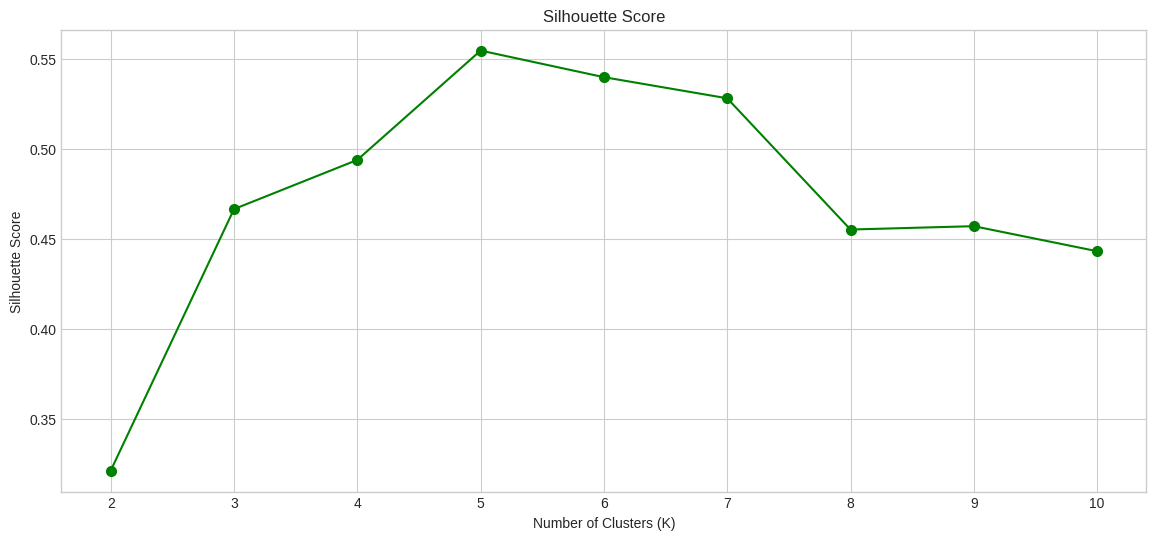

Best K: 5


In [11]:
# It is how similar a point is to its cluster vs other clusters
# Range: -1 (wrong cluster) to (+1) cluster

k_range = range(2, 11)       # need at least two clusters
sillhouette_scores = []

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  labels = kmeans.fit_predict(x_scaled)
  score = silhouette_score(x_scaled, labels)
  sillhouette_scores.append(score)

plt.figure(figsize=(14, 6))
plt.plot(k_range, sillhouette_scores, 'g-o', markersize=7)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.title('Silhouette Score')
plt.show()

best_k = k_range[np.argmax(sillhouette_scores)]
print(f"Best K: {best_k}")

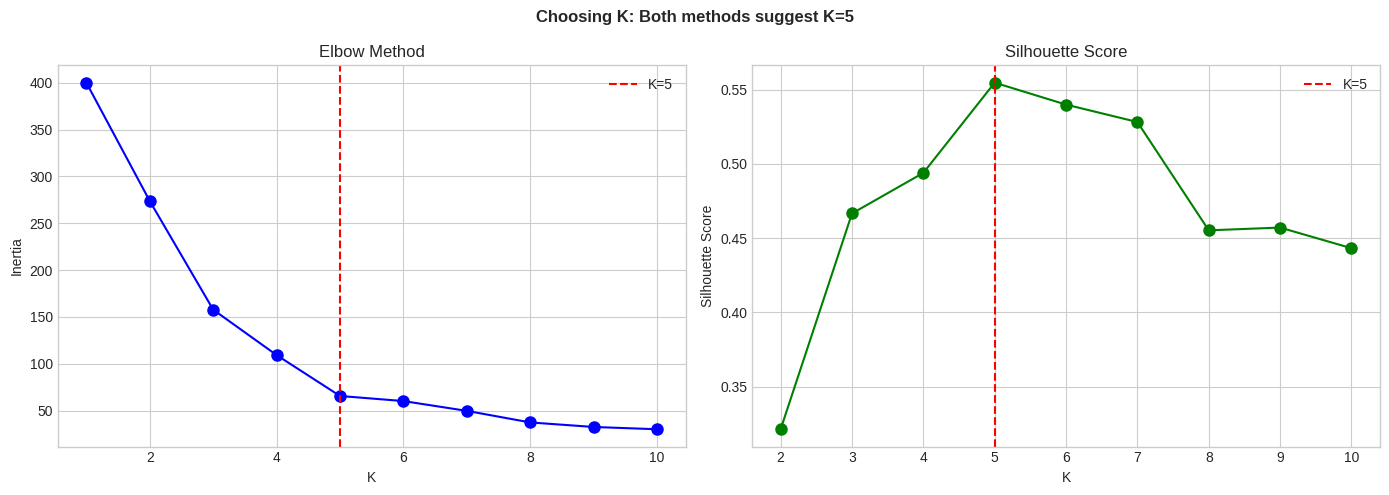

In [12]:
# Combined plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow
axes[0].plot(range(1, 11), inertias, 'b-o', markersize=8)
axes[0].axvline(x=5, color='red', linestyle='--', label='K=5')
axes[0].set_xlabel('K')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')
axes[0].legend()

# Silhouette
axes[1].plot(range(2, 11), sillhouette_scores, 'g-o', markersize=8)
axes[1].axvline(x=5, color='red', linestyle='--', label='K=5')
axes[1].set_xlabel('K')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score')
axes[1].legend()

plt.suptitle('Choosing K: Both methods suggest K=5', fontweight='bold')
plt.tight_layout()
plt.show()

Fitting K-Means with k = 5

In [13]:
#Final model
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(x_scaled)

print(f"Cluster Distribution")
print(df['cluster'].value_counts().sort_index())

Cluster Distribution
cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64


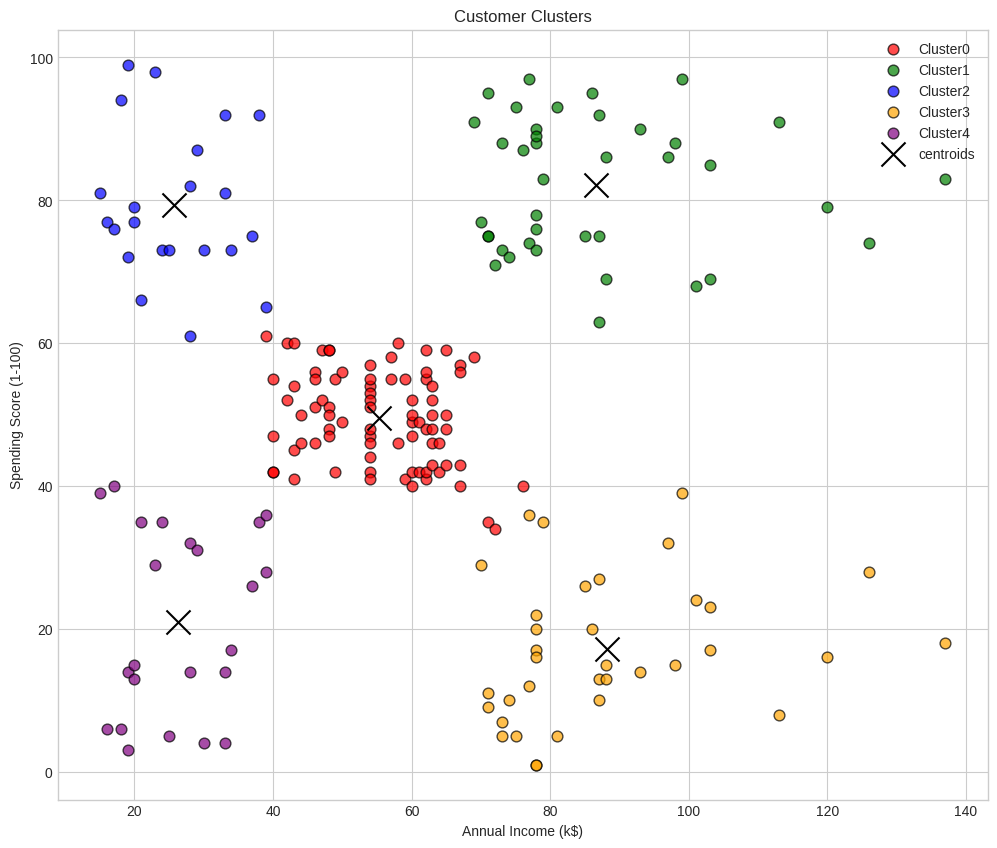

In [14]:
# Visualize the clusters
plt.figure(figsize=(12, 10))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i in range(5):
  cluster_data = df[df['cluster'] == i]
  plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
              c=colors[i], label=f"Cluster{i}", alpha=0.7, edgecolor='black', s=60)

#PLot the centroids
centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids_original[:, 0], centroids_original[:, 1],
            c='black', marker='x', s=300, label='centroids')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Clusters')
plt.legend()
plt.show()

interpreting the clusters

In [15]:
#Cluster Profile
cluster_summary = df.groupby('cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count'
}).round(1)

cluster_summary.columns = ['Average Age', 'Average Income', 'Average Spending Score', 'Number of Customers']

print("Cluster Profiles:")
print(cluster_summary)

Cluster Profiles:
         Average Age  Average Income  Average Spending Score  \
cluster                                                        
0               42.7            55.3                    49.5   
1               32.7            86.5                    82.1   
2               25.3            25.7                    79.4   
3               41.1            88.2                    17.1   
4               45.2            26.3                    20.9   

         Number of Customers  
cluster                       
0                         81  
1                         39  
2                         22  
3                         35  
4                         23  


In [16]:
#Naming the clusters
cluster_names = {}
for i in range(5):
  income = cluster_summary.loc[i, 'Average Income']
  spending = cluster_summary.loc[i, 'Average Spending Score']

  if income > 70 and spending > 70:
    cluster_data[i] = 'Premium Csutomers'
  elif income > 70 and spending < 40:
    cluster_data[i] = 'Careful High-earners'
  elif income < 40 and spending > 60:
    cluster_data[i] = 'Impulsive Buyers'
  elif income < 50 and spending < 40:
    cluster_data[i] = 'Budget Conscious'
  else:
    cluster_data[i] = "Average Customers"

print(f"Cluster names")
for i, name in cluster_data.items():
  print(f"Cluster {i}: {name}")

Cluster names
Cluster CustomerID: 0      1
2      3
4      5
6      7
8      9
10    11
12    13
14    15
16    17
18    19
20    21
22    23
24    25
26    27
28    29
30    31
32    33
34    35
36    37
38    39
40    41
42    43
44    45
Name: CustomerID, dtype: int64
Cluster Gender: 0       Male
2     Female
4     Female
6     Female
8       Male
10      Male
12    Female
14      Male
16    Female
18      Male
20      Male
22    Female
24    Female
26    Female
28    Female
30      Male
32      Male
34    Female
36    Female
38    Female
40    Female
42      Male
44    Female
Name: Gender, dtype: object
Cluster Age: 0     19
2     20
4     31
6     35
8     64
10    67
12    58
14    37
16    35
18    52
20    35
22    46
24    54
26    45
28    40
30    60
32    53
34    49
36    42
38    36
40    65
42    48
44    49
Name: Age, dtype: int64
Cluster Annual Income (k$): 0     15
2     16
4     17
6     18
8     19
10    19
12    20
14    20
16    21
18    23
20    24
22    25
24   

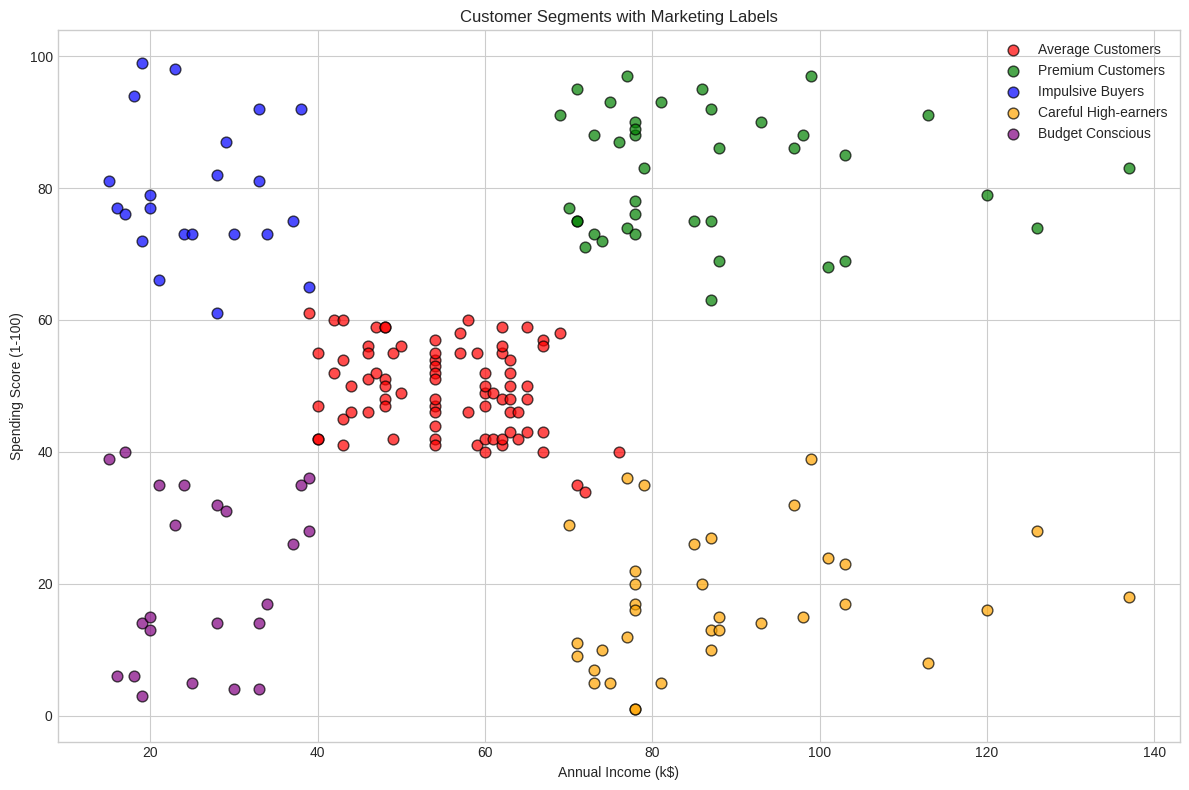

In [17]:
# Visualize with names
plt.figure(figsize=(12, 8))

# Re-create the mapping from cluster index to marketing label
# This is necessary because the original 'cluster_data' dictionary was overwritten
# The 'cluster_summary' DataFrame is still available from a previous cell.
cluster_names_map = {}
for idx in range(5):
  income = cluster_summary.loc[idx, 'Average Income']
  spending = cluster_summary.loc[idx, 'Average Spending Score']

  if income > 70 and spending > 70:
    cluster_names_map[idx] = 'Premium Customers'
  elif income > 70 and spending < 40:
    cluster_names_map[idx] = 'Careful High-earners'
  elif income < 40 and spending > 60:
    cluster_names_map[idx] = 'Impulsive Buyers'
  elif income < 50 and spending < 40:
    cluster_names_map[idx] = 'Budget Conscious'
  else:
    cluster_names_map[idx] = "Average Customers"


for i in range(5):
    # Use a different variable name for the DataFrame subset to avoid collision
    current_cluster_df = df[df['cluster'] == i]
    plt.scatter(current_cluster_df['Annual Income (k$)'],
                current_cluster_df['Spending Score (1-100)'],
                c=colors[i], label=f'{cluster_names_map[i]}', # Use the correct dictionary for labels
                alpha=0.7, edgecolor='black', s=60)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments with Marketing Labels')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

K-Means plus intialization

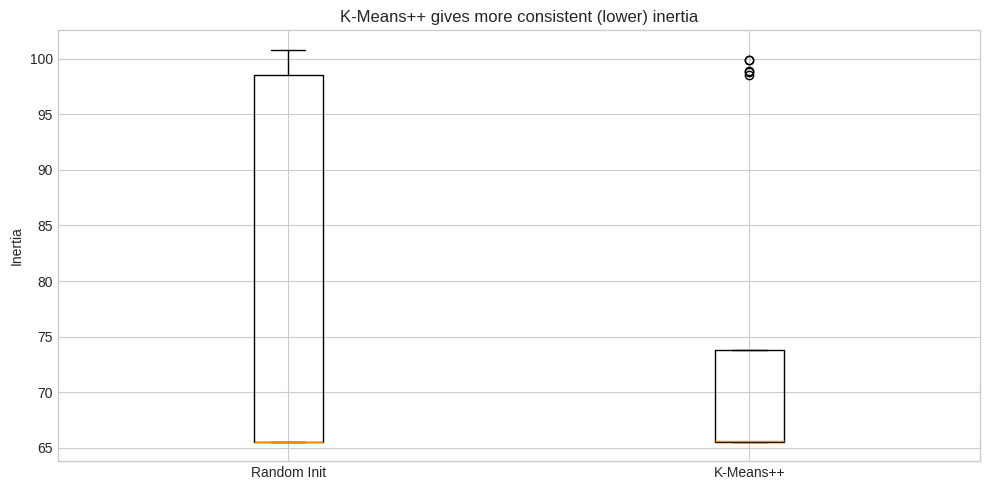

Random init: mean=77.24, std=15.91
K-Means++: mean=73.98, std=14.56


In [19]:
# Random init vs K-Means++
# K-Means++ spreads initial centroids apart

inertias_random = []
inertias_plus = []

for _ in range(20):
    km_random = KMeans(n_clusters=5, init='random', n_init=1, random_state=None)
    km_random.fit(x_scaled)
    inertias_random.append(km_random.inertia_)

    km_plus = KMeans(n_clusters=5, init='k-means++', n_init=1, random_state=None)
    km_plus.fit(x_scaled)
    inertias_plus.append(km_plus.inertia_)

fig, ax = plt.subplots(figsize=(10, 5))
ax.boxplot([inertias_random, inertias_plus], labels=['Random Init', 'K-Means++'])
ax.set_ylabel('Inertia')
ax.set_title('K-Means++ gives more consistent (lower) inertia')
plt.tight_layout()
plt.show()

print(f"Random init: mean={np.mean(inertias_random):.2f}, std={np.std(inertias_random):.2f}")
print(f"K-Means++: mean={np.mean(inertias_plus):.2f}, std={np.std(inertias_plus):.2f}")

Sillhouette Analysis

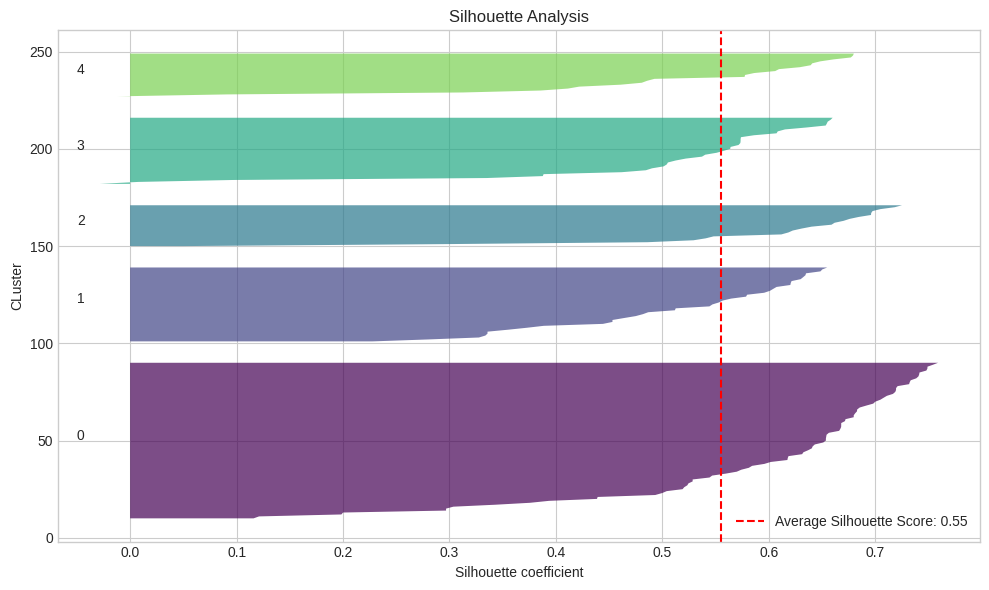

In [24]:
from matplotlib import cm

labels = kmeans.labels_
silhouette_vals = silhouette_samples(x_scaled, labels)

fig, ax = plt.subplots(figsize=(10, 6))

y_lower = 10
for i in range(5):
  cluster_silhouette_vals = silhouette_vals[labels == i]
  cluster_silhouette_vals.sort()

  y_upper = y_lower + len(cluster_silhouette_vals)
  color = cm.viridis(i / 5)

  ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, facecolor=color, alpha=0.7)
  ax.text(-0.05, y_lower +  0.5 * len(cluster_silhouette_vals), str(i))
  y_lower = y_upper + 10

ax.axvline(x=silhouette_score(x_scaled, labels), color='red', linestyle='--', label=f'Average Silhouette Score: {silhouette_score(x_scaled, labels):.2f}')
ax.set_xlabel('Silhouette coefficient')
ax.set_ylabel('CLuster')
ax.set_title('Silhouette Analysis')
ax.legend()
plt.tight_layout()
plt.show()

Clustering with more features

In [26]:
#including age
x_3d = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
x_3d_scaled = StandardScaler().fit_transform(x_3d)

#Find best K
silhouettes = []
for k in range(2, 11):
  km = KMeans(n_clusters=k, random_state=42, n_init=10)
  labels = km.fit_predict(x_3d_scaled)
  silhouettes.append(silhouette_score(x_3d_scaled, labels))

best_k_3d = range(2, 11)[np.argmax(silhouettes)]
print(f"Best K: {best_k_3d}")

Best K: 6


In [27]:
# Cluster with 3 features
kmeans_3d = KMeans(n_clusters=6, random_state=42, n_init=10)
df['Cluster_3D'] = kmeans_3d.fit_predict(x_3d_scaled)

#profile
cluster_3d_summary = df.groupby('Cluster_3D').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count'
}).round(1)

cluster_3d_summary.columns = ['Average Age', 'Average Income', 'Average Spending Score', 'Number of Customers']

print("Cluster Profiles:")
print(cluster_3d_summary)


Cluster Profiles:
            Average Age  Average Income  Average Spending Score  \
Cluster_3D                                                        
0                  56.3            54.3                    49.1   
1                  26.8            57.1                    48.1   
2                  41.9            88.9                    17.0   
3                  32.7            86.5                    82.1   
4                  25.0            25.3                    77.6   
5                  45.5            26.3                    19.4   

            Number of Customers  
Cluster_3D                       
0                            45  
1                            39  
2                            33  
3                            39  
4                            23  
5                            21  


In [28]:
#Business recommendations
print("Marketing REcommendations by segment")

recommendations = {
    "Premium Customers": "VIP programs, exclusive offers, personalized service",
    "Careful High-Earners": "Quality over price, investment pieces, loyalty rewards",
    "Impulsive Buyers": "Flash sales, limited-time offers, easy checkout",
    "Budget Conscious": "Discounts, value bundles, clearance sales",
    "Average Customers": "General promotions, seasonal campaigns"
}

for segment, rec in recommendations.items():
    print(f"{segment}: {rec}")

Marketing REcommendations by segment
Premium Customers: VIP programs, exclusive offers, personalized service
Careful High-Earners: Quality over price, investment pieces, loyalty rewards
Impulsive Buyers: Flash sales, limited-time offers, easy checkout
Budget Conscious: Discounts, value bundles, clearance sales
Average Customers: General promotions, seasonal campaigns



## Summary

### K-Means Algorithm

| Step | Action |
|------|--------|
| 1 | Initialize K centroids |
| 2 | Assign points to nearest centroid |
| 3 | Update centroids (mean) |
| 4 | Repeat until convergence |

### Choosing K

| Method | Look For |
|--------|----------|
| Elbow | Bend in inertia curve |
| Silhouette | Highest score |

### When to Use K-Means

**Good for:**
- Spherical clusters
- Similar-sized clusters
- Fast clustering needed

**Limitations:**
- Must specify K
- Assumes spherical clusters
- Sensitive to outliers
- Sensitive to initialization

### Key Parameters

| Parameter | Recommendation |
|-----------|----------------|
| n_clusters | Use elbow/silhouette |
| init | 'k-means++' (default) |
| n_init | 10 (default, runs multiple times) |